# 19 Sep 23 - CHAOS

## Halvorsen Attractor

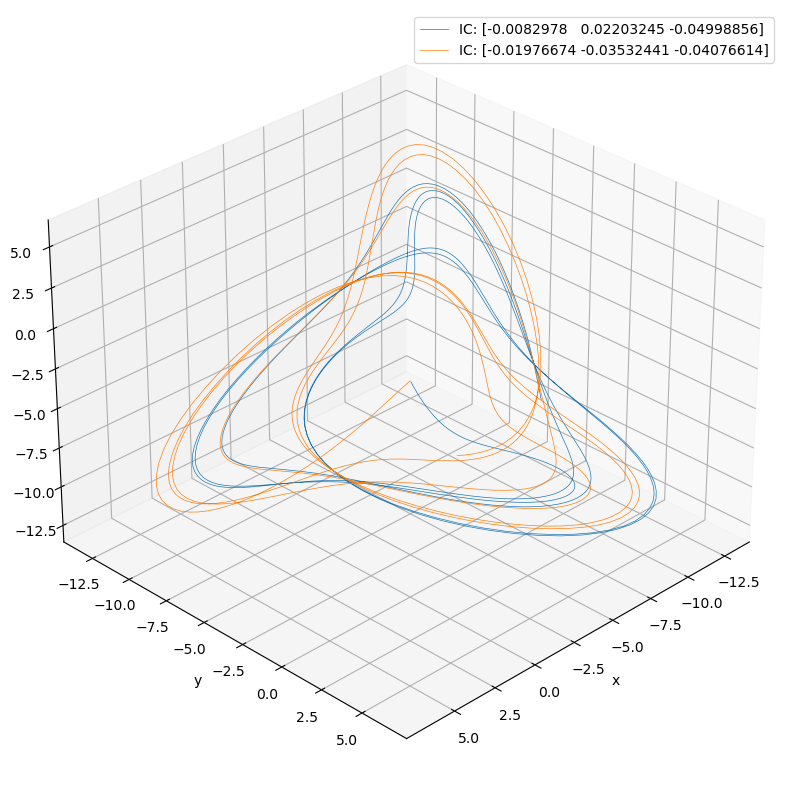

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def Halvorsen(t,curr_vals, a): 
    # Derivatives function for solve_ivp
    x,y,z = curr_vals 
    xdot = -a*x - 4*y - 4*z - y**2 
    ydot = -a*y - 4*z - 4*x - z**2
    zdot = -a*z - 4*x - 4*y - x**2
    return xdot,ydot,zdot

# Time Setup
tmax = 10
dt = 0.01
tspan = (0,tmax)
t = np.arange(0,tmax,dt)

# Parameters and initial conditions
a = 1.4
n_ics = 2 # number of initial conditions
n_dim = 3 # 3 dimensional problem
np.random.seed(1) # control randomness
initial_conditions = np.random.uniform(-0.05,0.05,(n_ics,n_dim)) # get n_ics initial conditions randomly from small box by the origin

# Call integrator for each initial condition
solutions = []
for initial_condition in initial_conditions:
    solved = solve_ivp(Halvorsen,tspan,initial_condition,t_eval = t, args = (a,),method="RK45")
    solutions.append(solved.y)

# Plotting
#%matplotlib widget ## UNCOMMENT TO BE ABLE TO PAN AROUND
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.view_init(30, 45) # Pick a nice initial view angle
for i,initial_condition in enumerate(initial_conditions):
    x,y,z = solutions[i]
    ax.plot3D(x,y,z, label = "IC: " +str(initial_condition),lw = 0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
plt.show()

**&#9989; Do this** 

1. Numerically calculate and plot the Euclidean distance between these two trajectories $||\delta(t)||$ as a function of time. What do you notice?
2. Also calculate  $\log ||\delta(t)||$ and plot it. What do you notice now?

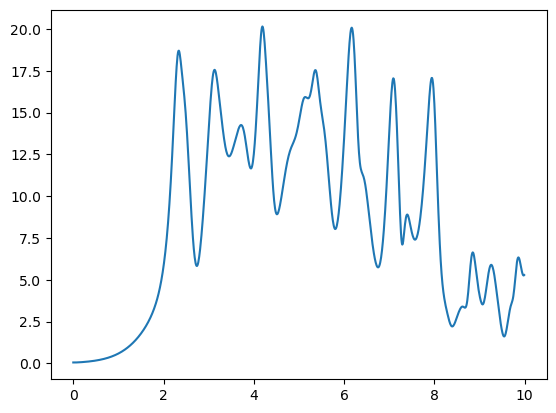

2.328664551443853


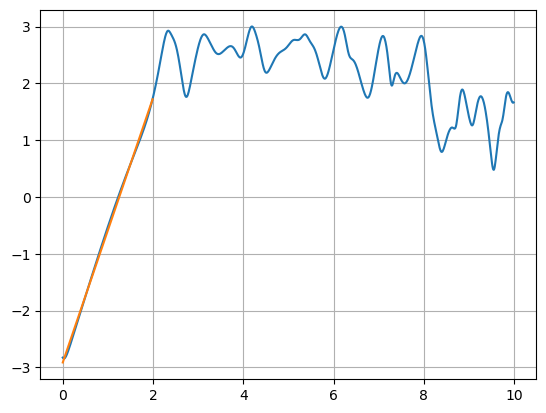

In [2]:
dist = np.zeros(len(t))
for i in range(len(t)):
    dist[i] = np.linalg.norm(solutions[0].T[i] - solutions[1].T[i])

plt.plot(t,dist)
plt.show()

end = 200
m,b = np.polyfit(t[0:end],np.log(dist)[0:end],1)
plt.plot(t,np.log(dist))
plt.plot(t[0:end],m*t[0:end] + b)
plt.grid()
print(m)

It would be really nice if we could 

## Driven Damped Pendulum

$$
\ddot{\theta} = - 2\beta\dot{\theta} - \omega_0^2\sin(\theta) + \gamma \omega_0^2 \cos(\omega t)
$$

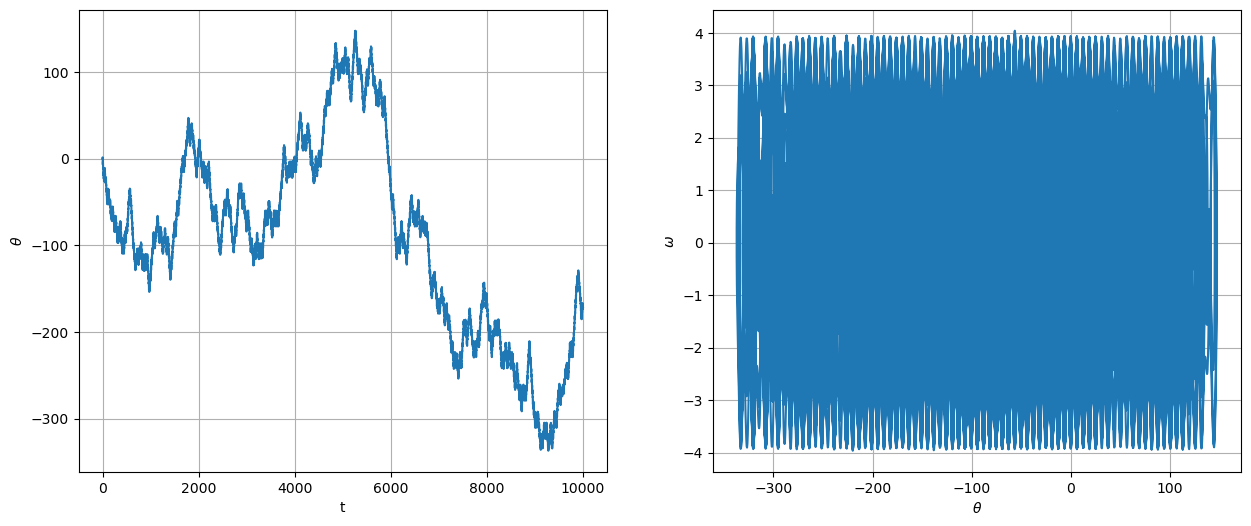

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def DDP(t,curr_vals, beta,omega0_2,gamma,omega): 
    # Derivatives function for solve_ivp
    theta,v = curr_vals 
    thetadot = v
    omegadot = -2*beta*v - omega0_2 * np.sin(theta) + gamma*omega0_2*np.cos(omega*t)
    return thetadot,omegadot

# Time Setup
tmax = 10000
dt = 0.1
tspan = (0,tmax)
t = np.arange(0,tmax,dt)

# Parameters and initial conditions
beta = 0.75/2
omega0_2 = 1.5**2
omega = 1
gamma = 1.5
initial_condition = [0.,0.]
initial_condition2 = [np.pi/3,2.101]

# Call integrator for each initial condition
solved = solve_ivp(DDP,tspan,initial_condition,t_eval = t, args = (beta,omega0_2,gamma,omega),method="RK45")
#solved2 = solve_ivp(DDP,tspan,initial_condition2,t_eval = t, args = (beta,omega0_2,gamma),method="RK45")

# Plotting
fig = plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(t,solved.y[0])
#plt.plot(t,solved2.y[0])
plt.xlabel("t")
plt.ylabel(r"$\theta$")
plt.grid()
plt.subplot(1,2,2)
plt.plot(solved.y[0],solved.y[1])
#plt.plot(solved2.y[0],solved2.y[1])
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\omega$")
plt.grid()

plt.show()

1592


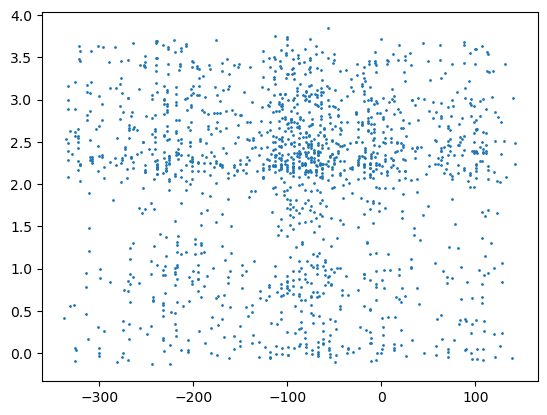

In [23]:
pts = [] # this does not work
for i, time in enumerate(t):
    if abs(time % (2*np.pi / omega)) < dt:
        pts.append([solved.y[0][i],solved.y[1][i]])
    else:
        pass
    
pts = np.array(pts)
print(len(pts))

plt.scatter(pts[:,0],pts[:,1],s = 1)